## **Melanoma Tumor Size Predicition using Machine Learning**

**Dataset**: https://www.kaggle.com/anmolkumar/machine-hack-melanoma-tumor-size-prediction

**Description**

Melanomas present in many different shapes, sizes, and colors. That’s why it’s tricky to provide a comprehensive set of warning signs. Melanoma, also known as malignant melanoma, is a type of skin cancer that develops from the pigment-producing cells known as melanocytes. The primary cause of melanoma is ultraviolet light (UV) exposure in those with low levels of the skin pigment melanin. The UV light may be from the sun or other sources, such as tanning devices.

Melanoma is the most dangerous type of skin cancer. Globally, in 2012, it newly occurred in 232,000 people. In 2015, there were 3.1 million people with active disease, which resulted in 59,800 deaths. Australia and New Zealand have the highest rates of melanoma in the world. There are also high rates in Northern Europe and North America, while it is less common in Asia, Africa, and Latin America. In the United States melanoma occurs about 1.6 times more often in men than women.

**Attributes**

1. **mass_npea**: the mass of the area understudy for melanoma tumor
2. **size_npear**: the size of the area understudy for melanoma tumor
3. **malign_ratio**:	ratio of normal to malign surface understudy
4. **damage_size**:	unrecoverable area of skin damaged by the tumor
5. **exposed_area**:	total area exposed to the tumor
6. **stddevmalign**:	standard deviation of malign skin measurements
7. **err_malign**:	error in malign skin measurements
8. **malign_penalty**:	penalty applied due to measurement error in the lab
9.**damage_ratio**:	the ratio of damage to total spread on the skin
10. **tumor_size**: size of melanoma_tumor

In [1]:
# Library for Data Analysis and Manipulation
import pandas as pd
# Library for Extensive Mathematical Operations
import numpy as np
# Library for Plotting the Data
import matplotlib.pyplot as plt
%matplotlib inline
# Library for Feature Selection Purpose
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# Library for Splitting the Data for Training and Testing Purpose
from sklearn.model_selection import train_test_split
# Library for Regression Model used for Training of the Data 
from sklearn.ensemble import RandomForestRegressor
# Library for Evaluation of Regression Model
from sklearn.metrics import mean_squared_error
# Library for Saving the Model
import pickle

In [2]:
# Dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/training_dataset.csv")

In [3]:
data.head(10)

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.4870,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.8810,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.0930,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.0150,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.4140,3263.35,57,35.0200,18.023
5,6851.09,2195.18,0.32041,72.8283,9.484467e+05,97.1881,3688.57,40,36.3481,1.709
6,7069.24,1886.09,0.26680,58.2686,1.024783e+06,76.9447,3168.44,22,39.9961,9.937
7,16446.10,5115.45,0.31104,204.9740,2.167355e+06,265.8810,6425.91,242,22.9533,2.510
8,6814.73,2043.78,0.29990,90.0889,9.669835e+05,99.6286,3428.54,27,37.1642,12.568
9,5049.75,949.82,0.18809,41.2957,6.906229e+05,70.4142,2734.59,27,41.1366,13.428


In [4]:
print(f'Length of Dataset: {len(data)} Records')

Length of Dataset: 9146 Records


### EDA (Exploratory Data Analysis)

#### Check for Null Values - Detection and Removal

In [5]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [6]:
# Data Description
data.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [7]:
data.isnull().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

#### Duplicate Data - Detection and Removal

In [8]:
data_dup = data[data.duplicated()]

In [9]:
data_dup.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
790,7725.48,2546.72,0.32965,74.6927,1.075574e+06,97.4814,3031.49,22,38.5300,16.231
1047,6411.31,2061.50,0.32154,44.7148,8.318863e+05,90.1626,3011.50,55,38.9741,3.429
1348,19280.70,4954.66,0.25697,236.0840,2.712240e+06,284.3710,5709.89,89,22.8924,1.529
1410,9755.12,2583.49,0.26483,100.2610,1.308135e+06,136.8110,3771.42,17,35.7199,1.755
1894,5797.02,2199.57,0.37943,40.4509,7.972690e+05,79.3778,2549.42,39,42.1658,13.330


In [10]:
duplicate_records = len(data_dup)
print(f'Duplicate Records in the Dataset: {duplicate_records}')

Duplicate Records in the Dataset: 93


In [11]:
data = pd.DataFrame.drop_duplicates(data)

In [12]:
data.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,988829.407,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2058426.301,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1434676.100,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1812195.183,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1043917.501,124.414,3263.35,57,35.0200,18.023


In [13]:
print(f'Length of Dataset [After Duplicates Removed]: {len(data)}')

Length of Dataset [After Duplicates Removed]: 9053


#### Outlier Removal

All Values below 5 percentile and above 95 percentile removed based on given tumor size value

In [14]:
data["tumor_size"].value_counts()

0.000     56
2.012      7
2.243      7
2.006      7
1.896      7
          ..
3.463      1
14.108     1
9.940      1
20.983     1
6.826      1
Name: tumor_size, Length: 6511, dtype: int64

In [15]:
min_threshold = data["tumor_size"].quantile(0.05)
max_threshold = data["tumor_size"].quantile(0.95)

In [16]:
print(f"Minimum Tumor Value {min_threshold}")
print(f"Maximum Tumor Value {max_threshold}")

Minimum Tumor Value 1.2294
Maximum Tumor Value 18.644599999999993


In [17]:
data_t = data[(data.tumor_size <= max_threshold) & (data.tumor_size>=min_threshold)]

In [18]:
data_t.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,988829.407,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2058426.301,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1434676.100,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1812195.183,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1043917.501,124.414,3263.35,57,35.0200,18.023


In [19]:
data_t.shape

(8147, 10)

In [20]:
data = data_t.copy()

In [21]:
data.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,988829.407,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2058426.301,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1434676.100,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1812195.183,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1043917.501,124.414,3263.35,57,35.0200,18.023


In [22]:
print(f"Length of Dataset [After Outlier Removed]: {len(data)}")

Length of Dataset [After Outlier Removed]: 8147


#### Feature Selection

Selecting the features of the dataset that contributes majorly in predicting tumor size

Method: Mutual Information Feature Selection

In [23]:
data.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,988829.407,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2058426.301,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1434676.100,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1812195.183,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1043917.501,124.414,3263.35,57,35.0200,18.023


In [24]:
X = data[["mass_npea","size_npear","malign_ratio","damage_size","exposed_area","std_dev_malign","err_malign","malign_penalty","damage_ratio"]]
y = data[["tumor_size"]]

In [25]:
X.shape, y.shape

((8147, 9), (8147, 1))

In [26]:
# Apply SelectKBest class to extract top 9 best features
bestfeatures = SelectKBest(score_func=mutual_info_regression,k="all")
fit = bestfeatures.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [28]:
dataScore1 = pd.concat([dfcolumns,dfscores],axis=1)
dataScore1.columns = ['Feature','Score']

In [29]:
dataScore1

,Feature,Score
0,mass_npea,0.132737
1,size_npear,0.093629
2,malign_ratio,0.100840
3,damage_size,0.199436
4,exposed_area,0.137799
5,std_dev_malign,0.150480
6,err_malign,0.203003
7,malign_penalty,0.121310
8,damage_ratio,0.197859


In [30]:
# Print Top 9 Features
print(dataScore1.nlargest(9,'Score'))

          Feature     Score
6      err_malign  0.203003
3     damage_size  0.199436
8    damage_ratio  0.197859
5  std_dev_malign  0.150480
4    exposed_area  0.137799
0       mass_npea  0.132737
7  malign_penalty  0.121310
2    malign_ratio  0.100840
1      size_npear  0.093629


#### Ploting Graphs ~ Independent and Depend Features

1. **Mass of Area** : the mass of the area understudy for melanoma tumor

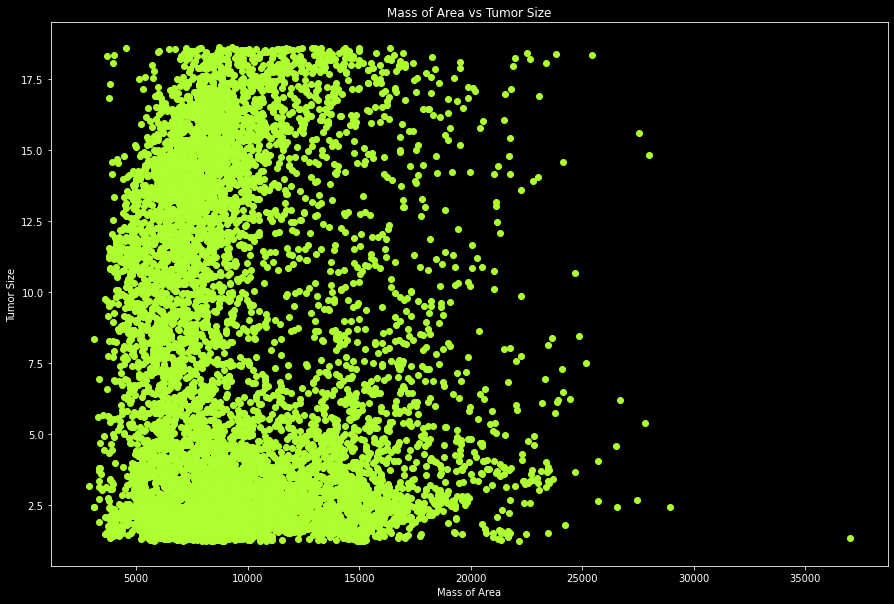

In [31]:
plt.style.use('dark_background')
x = data["mass_npea"]
y = data["tumor_size"]
plt.figure(figsize=(15,10))
plt.title('Mass of Area vs Tumor Size')
plt.xlabel('Mass of Area')
plt.ylabel('Tumor Size')
plt.scatter(x,y,color=['greenyellow'])
plt.show();

2. **Size of Area** : the size of the area understudy for melanoma tumor

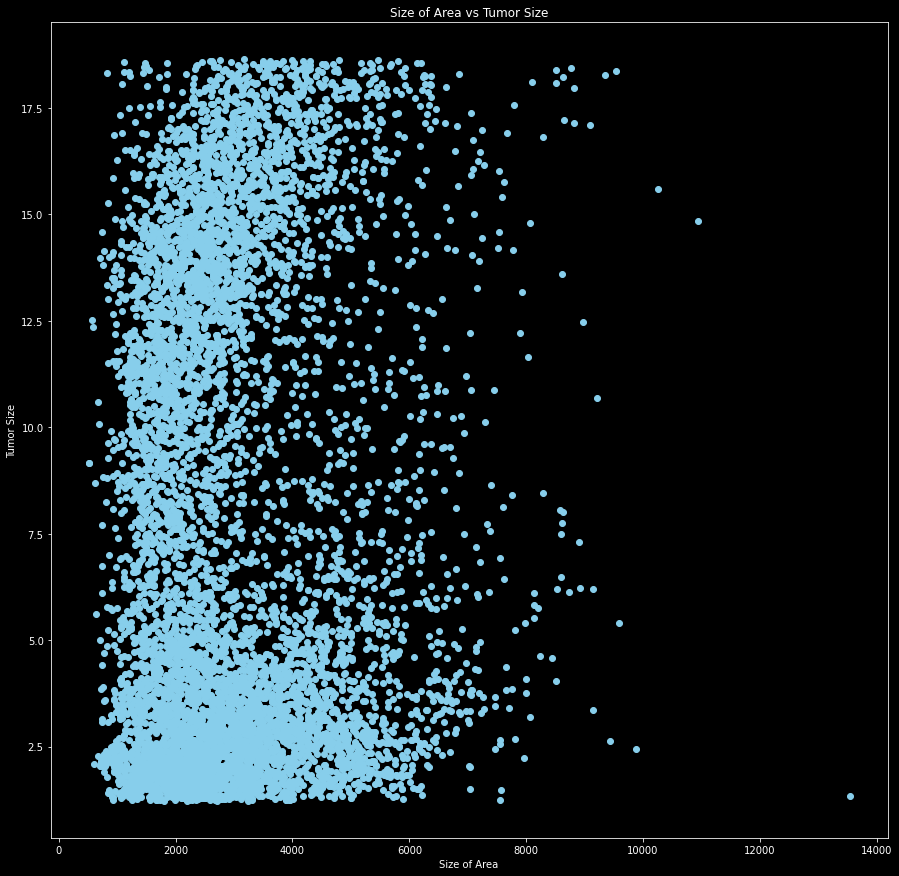

In [32]:
x = data["size_npear"]
y = data["tumor_size"]
plt.figure(figsize=(15,15))
plt.title('Size of Area vs Tumor Size')
plt.xlabel('Size of Area')
plt.ylabel('Tumor Size')
plt.scatter(x,y,color=['skyblue'])
plt.show();

3. **Ratio Normal to Malign**: ratio of normal to malign surface understudy

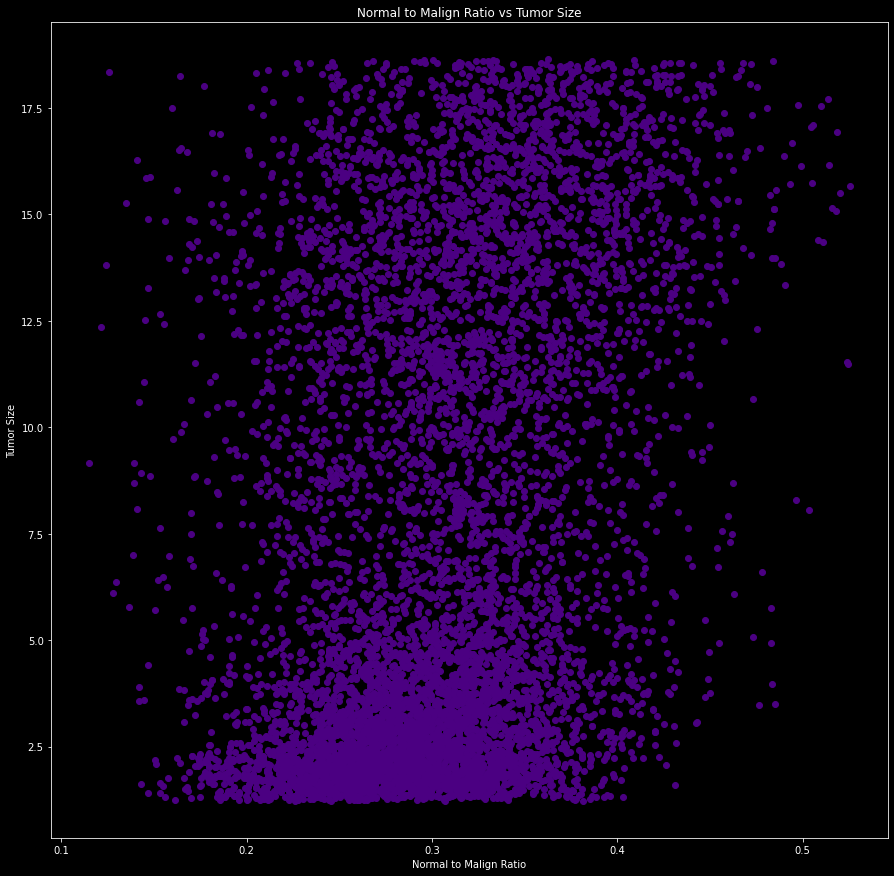

In [33]:
x = data["malign_ratio"]
y = data["tumor_size"]
plt.figure(figsize=(15,15))
plt.title('Normal to Malign Ratio vs Tumor Size')
plt.xlabel('Normal to Malign Ratio')
plt.ylabel('Tumor Size')
plt.scatter(x,y,color=['indigo'])
plt.show();

4. **Unrecoverable Area**: unrecoverable area of skin damaged by the tumor 

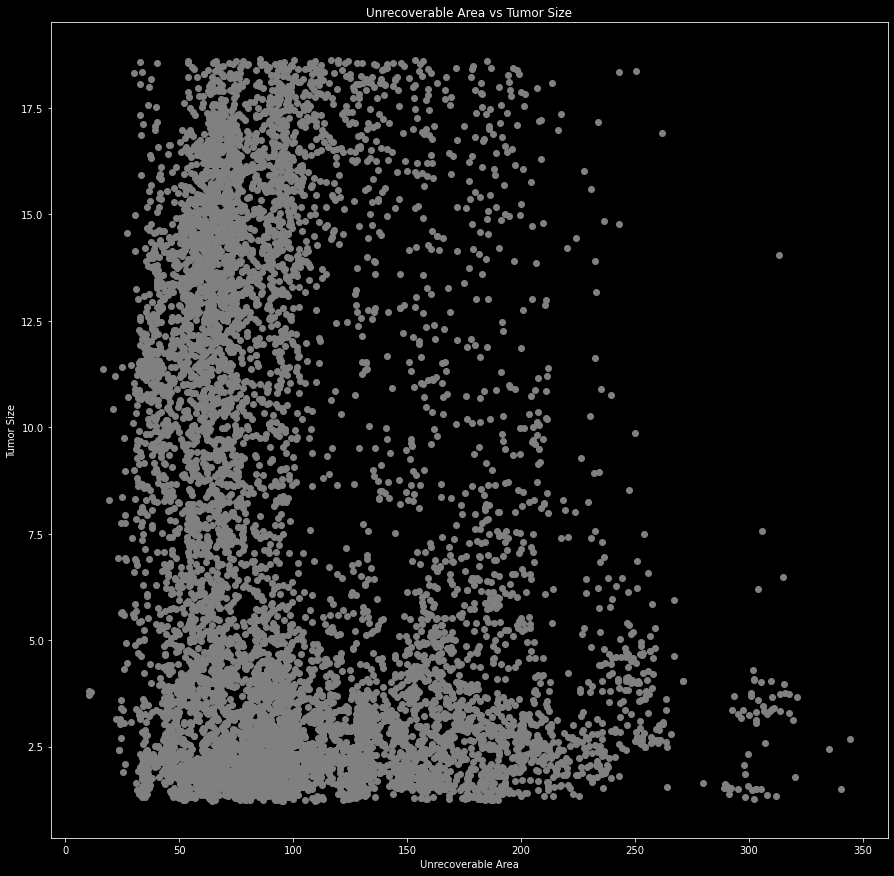

In [34]:
x = data["damage_size"]
y = data["tumor_size"]
plt.figure(figsize=(15,15))
plt.title('Unrecoverable Area vs Tumor Size')
plt.xlabel('Unrecoverable Area')
plt.ylabel('Tumor Size')
plt.scatter(x,y,color=['grey'])
plt.show();

5. **Exposed Area**: total area exposed to the tumor

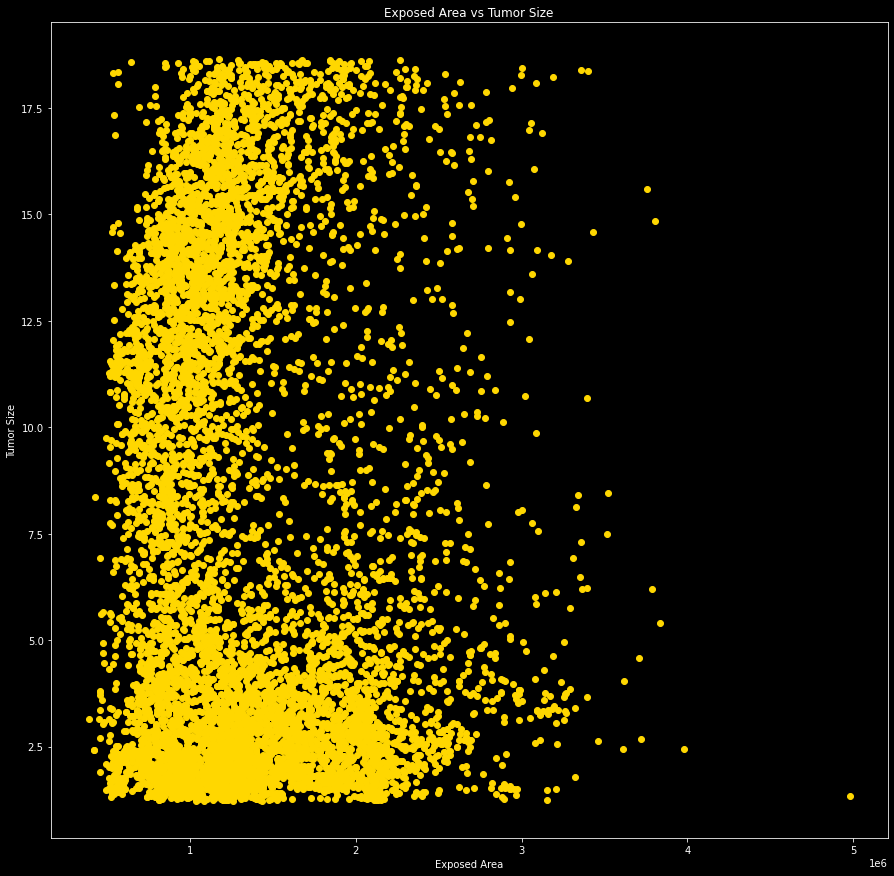

In [35]:
x = data["exposed_area"]
y = data["tumor_size"]
plt.figure(figsize=(15,15))
plt.title('Exposed Area vs Tumor Size')
plt.xlabel('Exposed Area')
plt.ylabel('Tumor Size')
plt.scatter(x,y,color=['gold'])
plt.show();

6. **Standard Deviation of Malign Skin**: standard deviation of malign skin measurements

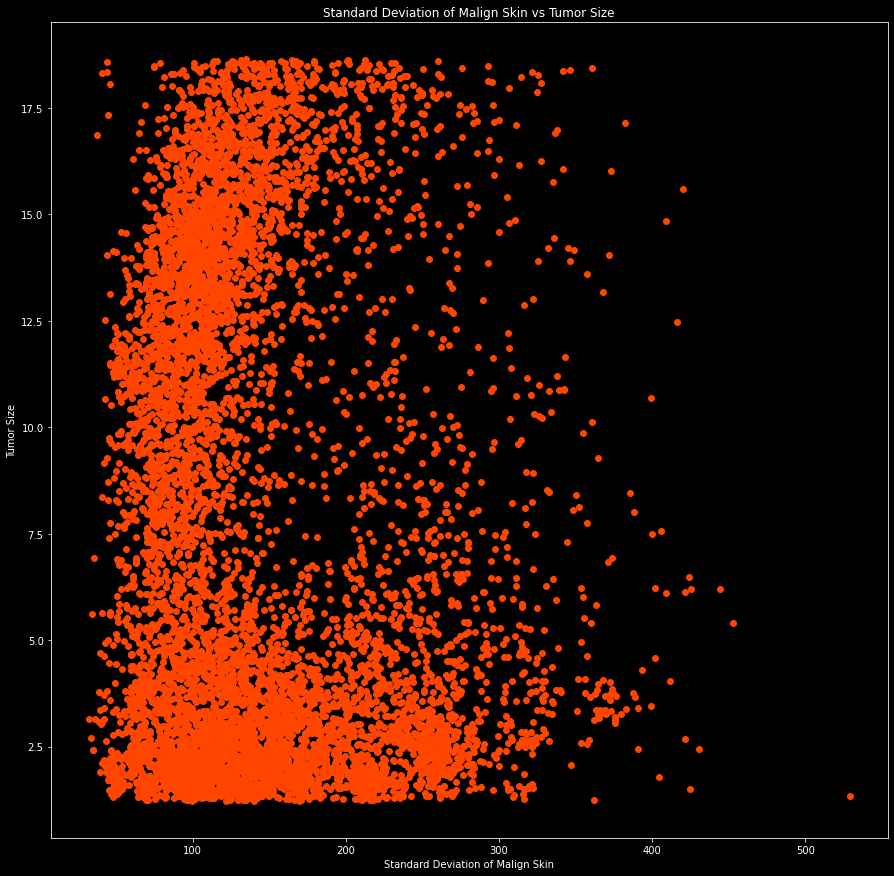

In [36]:
x = data["std_dev_malign"]
y = data["tumor_size"]
plt.figure(figsize=(15,15))
plt.title('Standard Deviation of Malign Skin vs Tumor Size')
plt.xlabel('Standard Deviation of Malign Skin')
plt.ylabel('Tumor Size')
plt.scatter(x,y,color=['orangered'])
plt.show();

7 **Measurement Errors** : error in malign skin measurements

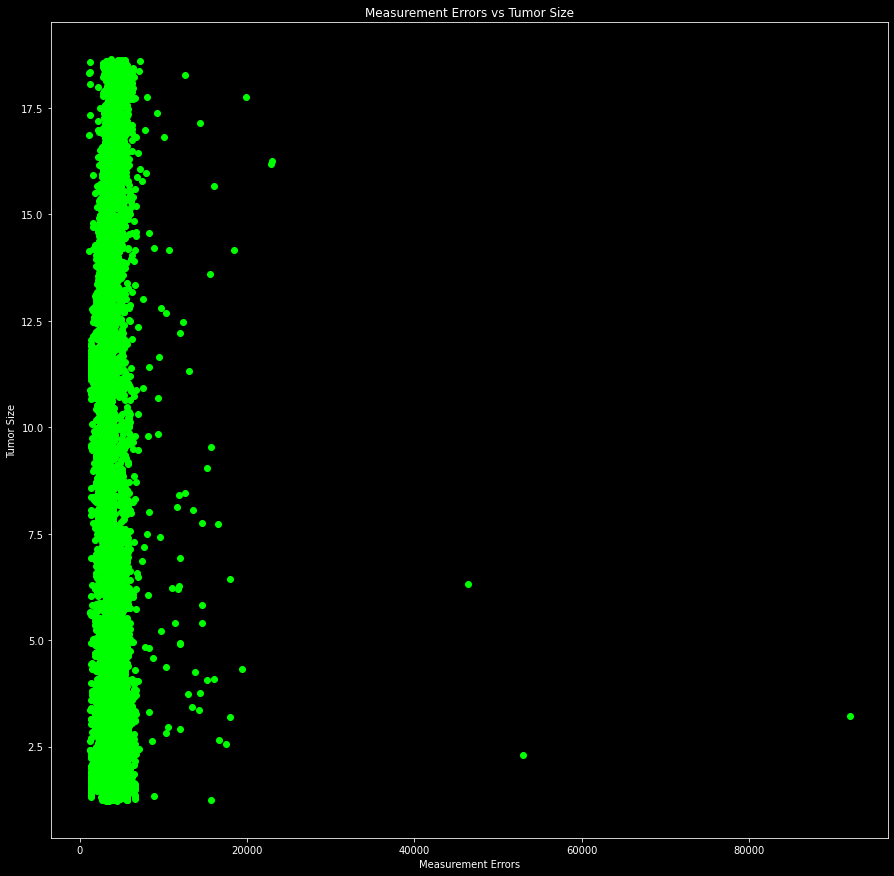

In [37]:
x = data["err_malign"]
y = data["tumor_size"]
plt.figure(figsize=(15,15))
plt.title('Measurement Errors vs Tumor Size')
plt.xlabel('Measurement Errors')
plt.ylabel('Tumor Size')
plt.scatter(x,y,color=['lime'])
plt.show();

8. **Penalty to Measurement Error**: penalty applied due to measurement error in the lab

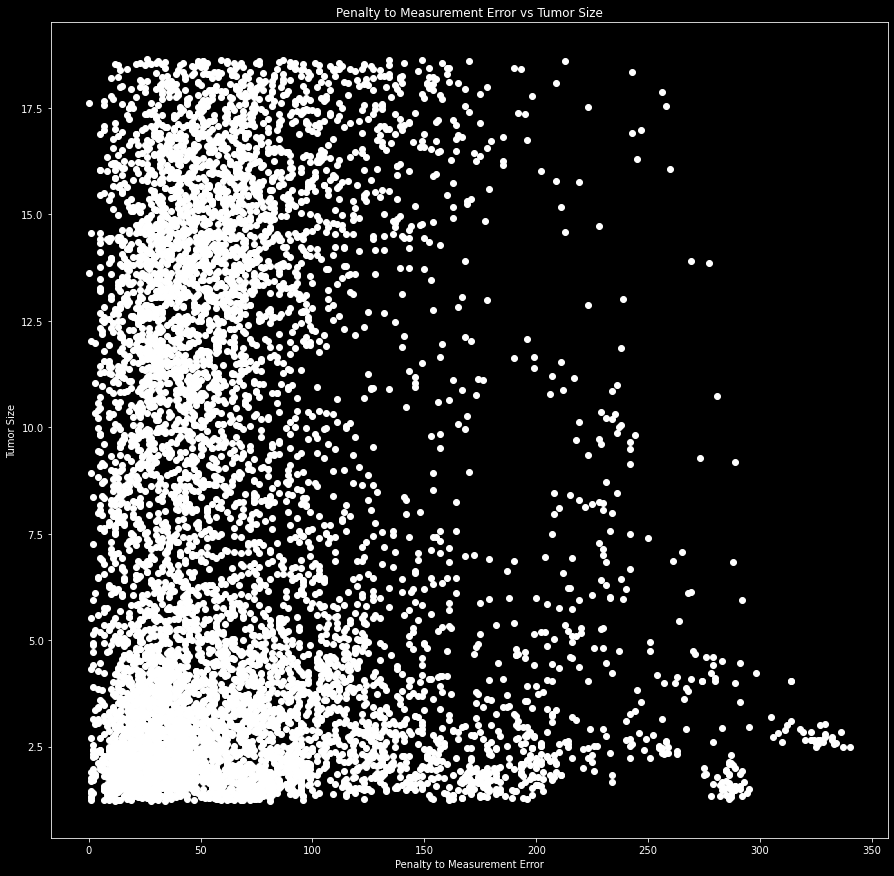

In [38]:
x = data["malign_penalty"]
y = data["tumor_size"]
plt.figure(figsize=(15,15))
plt.title('Penalty to Measurement Error vs Tumor Size')
plt.xlabel('Penalty to Measurement Error')
plt.ylabel('Tumor Size')
plt.scatter(x,y,color=['white'])
plt.show();

9. **Total Damage Ratio** : the ratio of damage to total spread on the skin

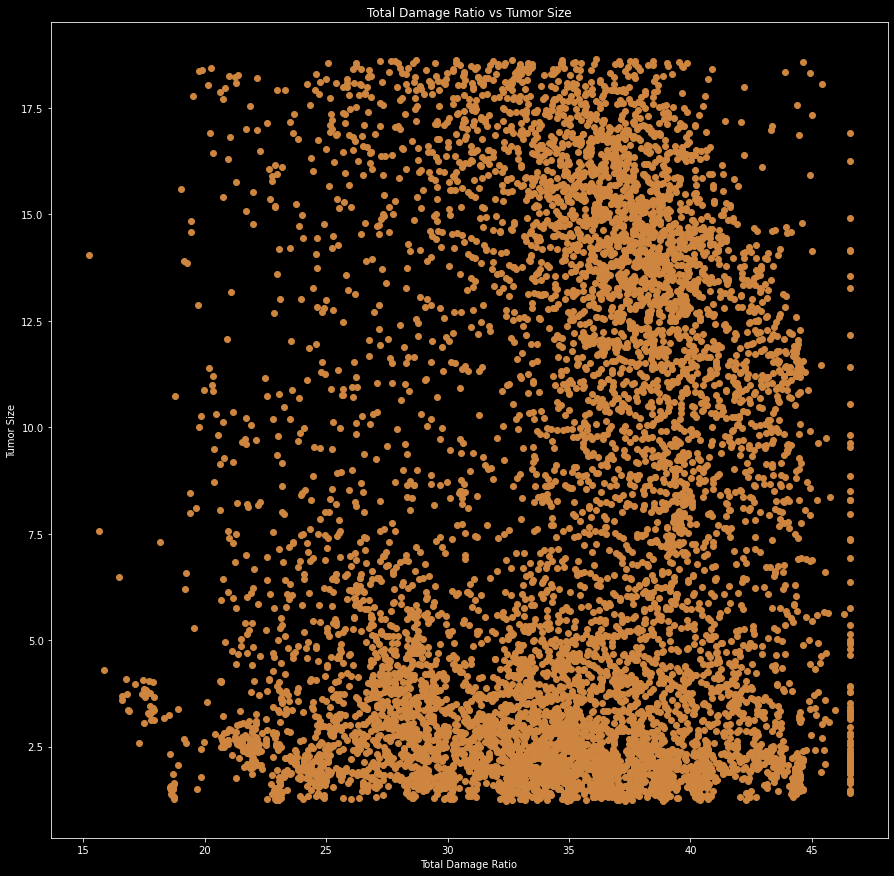

In [39]:
x = data["damage_ratio"]
y = data["tumor_size"]
plt.figure(figsize=(15,15))
plt.title('Total Damage Ratio vs Tumor Size')
plt.xlabel('Total Damage Ratio')
plt.ylabel('Tumor Size')
plt.scatter(x,y,color=['peru'])
plt.show();

### Spliting of Dataset
  1. Training Dataset
  2. Testing Dataset

In [40]:
print(f'Length of the Dataset: {len(data)}')

Length of the Dataset: 8147


In [41]:
X = data.drop(['tumor_size'],axis=1)
y = data['tumor_size']

In [42]:
X.shape, y.shape

((8147, 9), (8147,))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [44]:
print(f'Shape of Training Input {X_train.shape}')
print(f'Shape of Training Output {y_train.shape}')
print(f'Shape of Testing Input {X_test.shape}')
print(f'Shape of Testing Output {y_test.shape}')

Shape of Training Input (6110, 9)
Shape of Training Output (6110,)
Shape of Testing Input (2037, 9)
Shape of Testing Output (2037,)


### Model Training

In [45]:
regress_model = RandomForestRegressor(n_estimators=100,random_state=0)

In [46]:
regress_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [47]:
# Prediction
predict = regress_model.predict(X_test)

In [48]:
predict[0:5]

array([5.10873, 6.97119, 3.68395, 9.10313, 5.27042])

### Model Evaluation

In [49]:
error = mean_squared_error(predict,y_test)

In [50]:
acc_score = 100.00 - error

In [51]:
acc_result = "{:.2f}".format(acc_score)
error_result = "{:.2f}".format(error)

In [52]:
print(f"Accuracy of Random Forest Regressor : {acc_result} %")
print(f"Mean Square Error of Random Forest Regressor: {error_result} %")

Accuracy of Random Forest Regressor : 84.91 %
Mean Square Error of Random Forest Regressor: 15.09 %


### Making Prediction

In [53]:
mass_npea = 15635.7
size_npear = 4879.36
malign_ratio = 0.31206
damage_size = 223.55
exposed_area = 2058426.301
std_dev_malign = 248.881
err_malign = 5952.53
malign_penalty = 240
damage_ratio = 22.0253
# Input Features
input_features = [[mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio]]
# Making Predicition
prediction = regress_model.predict(input_features)         

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
prediction

array([2.69457])

### Model Saving

In [55]:
# Random Forest Regressor estimator /model is saved
pickle.dump(regress_model,open("RandomForestRegressor.pkl","wb"))